In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [12]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing

from sklearn import tree

In [13]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing values checking

<AxesSubplot:>

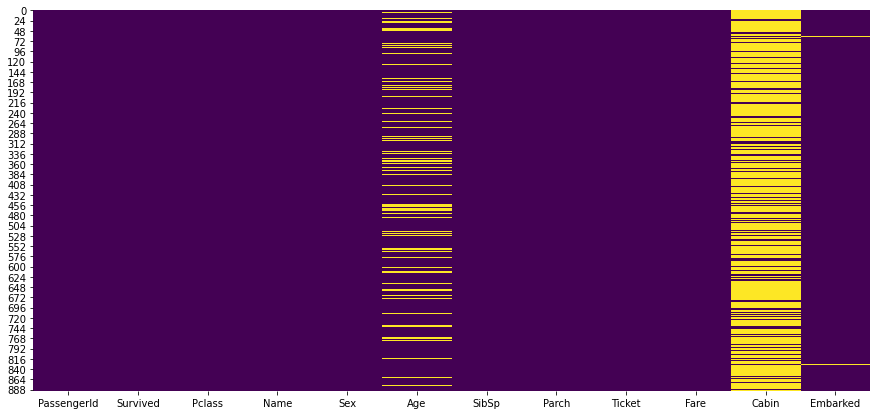

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")

## Data preprocessing

In [77]:
df_train = train[['PassengerId','Sex','Pclass','Age','Survived','Embarked','Cabin']]

le = preprocessing.LabelEncoder()
le.fit(df_train['Sex'])
df_train['Sex'] = le.transform(df_train['Sex'])
df_train['Age'].fillna(df_train['Age'].mode()[0],inplace=True)
le.fit(df_train['Embarked'])
df_train['Embarked'] = le.transform(df_train['Embarked'])
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)
le.fit(df_train['Cabin'])
df_train['Cabin'] = le.transform(df_train['Cabin'])
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0],inplace=True)

df_test = test[['PassengerId','Sex','Pclass','Age','Embarked','Cabin']]

le = preprocessing.LabelEncoder()
le.fit(df_test['Sex'])
df_test['Sex'] = le.transform(df_test['Sex'])
df_test['Age'].fillna(df_test['Age'].mode()[0],inplace=True)
le.fit(df_test['Embarked'])
df_test['Embarked'] = le.transform(df_test['Embarked'])
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0],inplace=True)
le.fit(df_test['Cabin'])
df_test['Cabin'] = le.transform(df_test['Cabin'])
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0],inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

## EDA

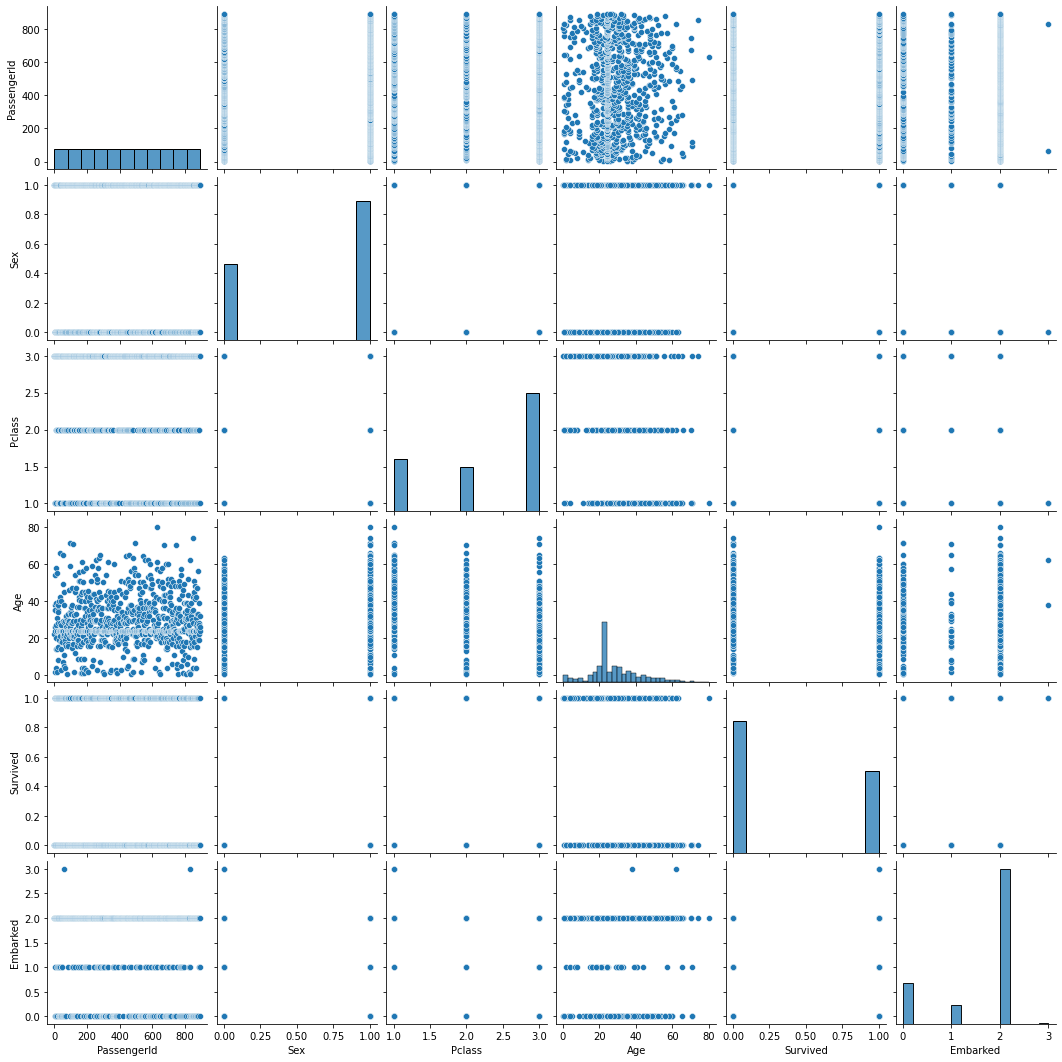

In [57]:
g = sns.pairplot(df_train)

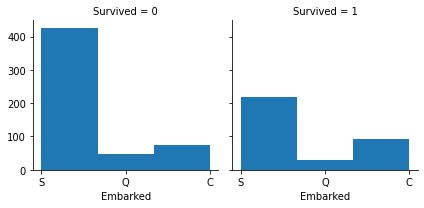

In [43]:
g = sns.FacetGrid(df_train, col='Survived', col_wrap=2)
#g.map(plt.hist, 'Pclass', bins=3)
#g.map(plt.hist, 'Sex', bins=2)
g.map(plt.hist, 'Embarked', bins=3)

## Training and Fitting

In [78]:
import xgboost as xgb
import sklearn
import scipy

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

target = df_train["Survived"].values
train_features = df_train[["Pclass", "Sex", "Age",'Embarked']].values
test_features = df_test[["Pclass", "Sex", "Age","Embarked"]].values

X_train_docs, X_val_docs, y_train, y_val = train_test_split(
    train_features,target , test_size=0.2, random_state=42) 

clf = xgb.XGBClassifier(seed=42, nthread=1)
clf = clf.fit(X_train_docs, 
              y_train, eval_set=[(X_train_docs, y_train),
                                 (X_val_docs, y_val)],
              verbose=11)

y_pred = clf.predict(test_features)
y_pred_probs = clf.predict_proba(test_features)

[02:31:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.56358	validation_1-logloss:0.57654
[11]	validation_0-logloss:0.34388	validation_1-logloss:0.44864
[22]	validation_0-logloss:0.31987	validation_1-logloss:0.44931
[33]	validation_0-logloss:0.30823	validation_1-logloss:0.45162
[44]	validation_0-logloss:0.29687	validation_1-logloss:0.45680
[55]	validation_0-logloss:0.29164	validation_1-logloss:0.46586
[66]	validation_0-logloss:0.28428	validation_1-logloss:0.46834
[77]	validation_0-logloss:0.28010	validation_1-logloss:0.47575
[88]	validation_0-logloss:0.27589	validation_1-logloss:0.48142
[99]	validation_0-logloss:0.27249	validation_1-logloss:0.48686


In [79]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)